In [4]:
import random
import math

import numpy as np

from os.path import join
from os import listdir
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import transform
from skimage import exposure
from skimage.io import imread
from skimage.util import random_noise
from skimage.feature import hog


orlfacesdir = '../data/raw/OrlFaces20'
pessoalicmcdir = '../data/raw/PessoasICMC'

PLOT = True

In [5]:
# data augmentation for the ICMC dataset
def gen_data(base_image, quantity, label):
    data = []
    labels = []
	# for all input images
    for _ in range(0, quantity):
        pepper_seed = random.randint(10, 20)
        rotate_degrees = random.uniform(-10, 10)
		
		# resize image
        img = transform.resize(base_image, (112, 92), anti_aliasing=True)
		
		# add random pepper effect as noise to the image
        img = random_noise(img, mode='pepper', seed=pepper_seed, clip=True)
		
		# randomly rotate image by a maximum of 10 degrees
        img = transform.rotate(img, rotate_degrees, resize=False, center=None, order=1, mode='constant', cval=1,
                               clip=True, preserve_range=True)
        # add blur effect to the image
        img = ndimage.gaussian_filter(img, sigma=2)

        data.append(img)
        labels.append(label)
		
    return data, labels

# load all images in input path
def load_images(path):
    images = []
    labels = []
    dictionary = {}
	
	# run through all subdirectories and collect their images
    for _, d in enumerate(listdir(path)):
        if d in dictionary.values():
            l = dictionary[d]
        else:
            l = len(dictionary.keys()) + 1
            dictionary[l] = d
        d = join(path, d)
        for i in listdir(d):
            image = imread(join(d, i), as_gray=True)
            images.append(image)
            labels.append(l)
    return images, labels, dictionary

# plot images in input array. Images are put together in a matrix
def plot_images(array, rows, columns):
    fig = plt.figure(figsize=(columns * 2, rows * 2))
    for i, j in enumerate(array):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.grid(False)
        plt.imshow(j, cmap=plt.cm.gray)

    plt.show()

# generate HOG feature descriptors and their visualization
def hog_images(imgs):
    feature_descriptors_list, hog_imgs = [], []
    for i, image in enumerate(imgs):
		# generate HOG features using a specific configuration that creates them fast 
        # without causing performance loss in classifiers
        feature_descriptors, hog_image = hog(image, orientations=9, pixels_per_cell=(4, 4),
                            cells_per_block=(1, 1), visualize=True, multichannel=False,
                            transform_sqrt=True, block_norm="L1")
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        feature_descriptors_list.append(feature_descriptors)
        hog_imgs.append(hog_image_rescaled)
        print('\r\tHOG %d/%d generated' % (i + 1, len(imgs)), end='')
    print()
    return feature_descriptors_list, hog_imgs

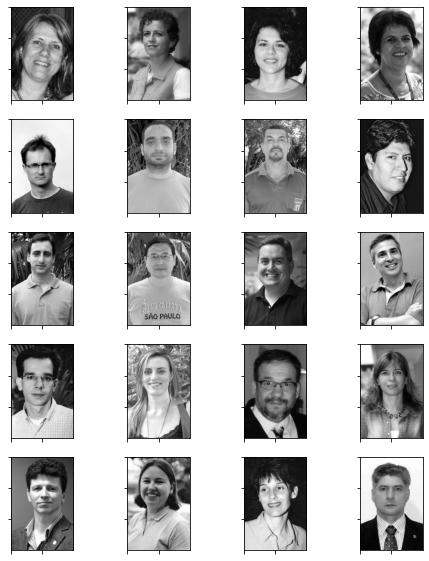

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [19]:
images, labels_a, dictionary_icmc = load_images(pessoalicmcdir)
if PLOT:
    plot_images(images, math.ceil(len(images) / 4), 4)
    print(labels_a)

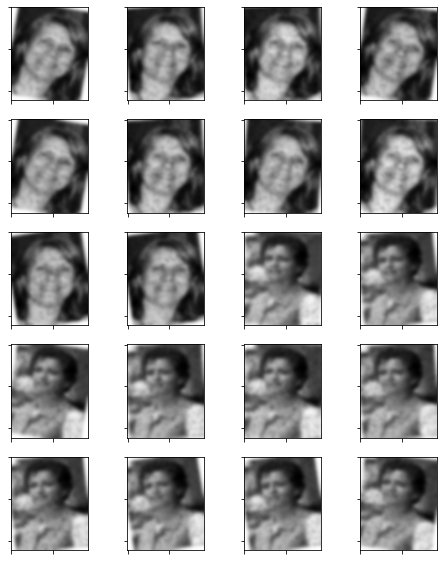

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [18]:
dataset_icmc, labels_icmc = [], []
for im, l in zip(images, labels_a):
    a, b = gen_data(im, 10, l)
    dataset_icmc += a
    labels_icmc += b

if PLOT:
    plot_images(dataset_icmc[:20], math.ceil(len(dataset_icmc[:20]) / 4), 4)
    print(labels_icmc)

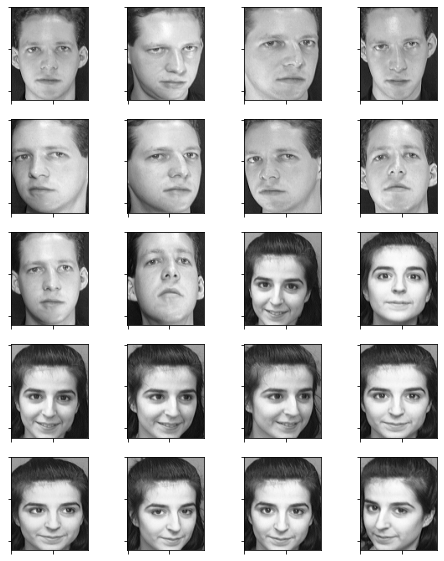

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [17]:
dataset_orl, labels_orl, dictionary_orl = load_images(orlfacesdir)
if PLOT:
  plot_images(dataset_orl[:20], math.ceil(len(dataset_orl[:20]) / 4), 4)
  print(labels_orl[:20])

	HOG 20/20 generated


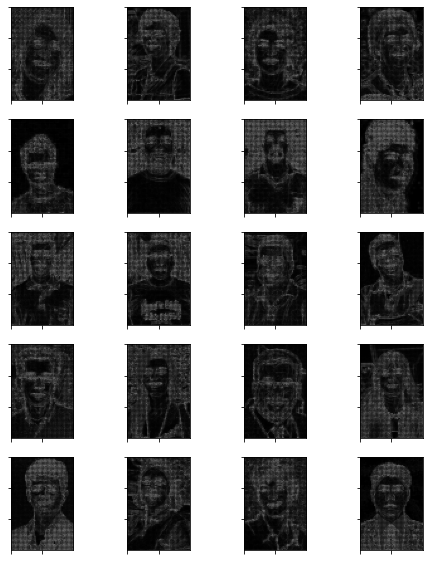

In [20]:
fd_icmc, hog_icmc = hog_images(images[:20])

if PLOT:
    plot_images(hog_icmc, math.ceil(len(hog_icmc) / 4), 4)

	HOG 20/20 generated


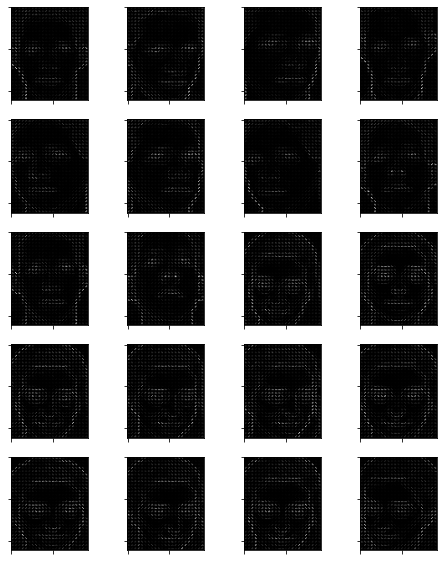

In [22]:
fd_orl, hog_orl = hog_images(dataset_orl[:20])

if PLOT:
  plot_images(hog_orl, math.ceil(len(hog_orl) / 4), 4)